# Importaciones

In [1]:
# Importamos las librerías básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Añadimos una sentencia que nos permite visualizar las imágenes dentro de la propia ejecución del comando
%matplotlib inline

In [2]:
# Importamos las fuentes de datos
from keras.datasets import mnist

# Cargamos el paquete con el método load_data(). Por defecto realiza un split de 6/7 Train y 1/7 Test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Vemos el shape de x_train
x_train.shape

(60000, 28, 28)

# Pre Procesado

#### Visualización de las imágenes

In [4]:
# Definimos una variable que contenga la primer imagen del dataset
primera_imagen = x_train[0]

In [5]:
# Vemos su shape
primera_imagen.shape

(28, 28)

In [6]:
# Vemos como está conformado el array con valores entre 0 y 255 (ByN)
primera_imagen

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

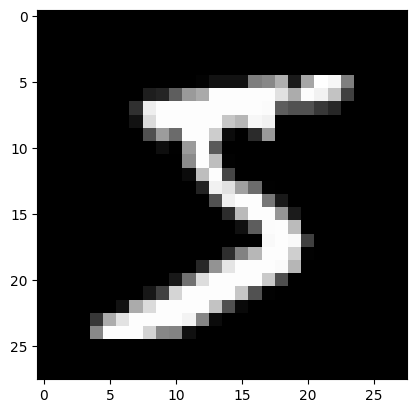

In [7]:
# Visualizamos la imagen con plt.imshow() con cmap en escala de grises
"""
https://matplotlib.org/stable/tutorials/colors/colormaps.html
"""
plt.imshow(primera_imagen, cmap='gray')

#### Transformación categórica de la salida

y_train corresponde a las etiquetas de salida de cada imagen de x_train, y_test corresponde a las etiquetas de salidad de cada imagen de y_train

In [8]:
# Transformamos cada etiqueta a un array de categorías (en este caso son 10 categorías que corresponden los números del 0 al 9)

# Importamos to_categorical desde keras.utils
from keras.utils import to_categorical

In [9]:
# Definimos una variable que contenga la matriz con todos los arrays de categorías correspondientes a cada imagen en y_train
categ_y_train = to_categorical(y_train)

categ_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [10]:
# Definimos una variable que contenga la matriz con todos los arrays de categorías correspondientes a cada imagen en y_test
categ_y_test = to_categorical(y_test) 

categ_y_test.shape

(10000, 10)

#### Escalado

In [11]:
"""
Como tenemos valores entre 0 y 255, para escalar dividimos la muestra en 255. De esta manera el valor mínimo (0) correspondería con 0 
y el valor máximo (255) correspondería con 1
"""

print(f"Valor mínimo:{primera_imagen.min()}")
print(f"Valor máximo:{primera_imagen.max()}")

Valor mínimo:0
Valor máximo:255


In [12]:
# Aplicamos el factor 1/255 para escalar
x_train = x_train/255
x_test = x_test/255

primera_imagen_esc = x_train[0]
print(f"Valor mínimo:{primera_imagen_esc.min()}")
print(f"Valor máximo:{primera_imagen_esc.max()}")

Valor mínimo:0.0
Valor máximo:1.0


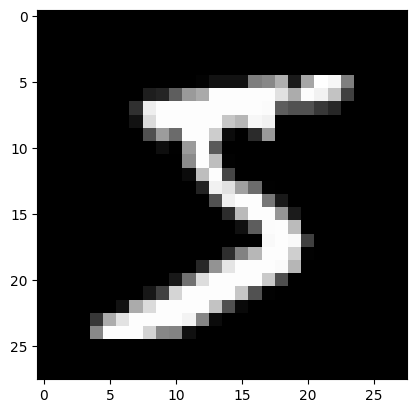

In [13]:
# La imagen sigue siendo exactamente la misma pero con sus valores escalados
plt.imshow(primera_imagen_esc, cmap='gray')

In [14]:
# Todos sus valores se encuentran entre 0 y 1
primera_imagen_esc

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Redimensionado de las muestras de imágenes

In [15]:
# Para poder trabajar con nuestro modelo, debemos redimensionar para especificar el canal de color

# Hasta ahora solo maneja dos dimensiones: ancho y alto
x_train.shape

(60000, 28, 28)

In [16]:
# Aplicamos reshape() en el conjunto x_train para incluir la dimensión del canal de color (en este caso, al ser ByN, solamente sería 1 canal)
x_train = x_train.reshape(60000, 28, 28, 1)

x_train.shape

(60000, 28, 28, 1)

In [17]:
# Aplicamos reshape() en el conjunto x_test
x_test = x_test.reshape(10000, 28, 28, 1)

x_test.shape

(10000, 28, 28, 1)

# Creación del modelo

In [18]:
# Importamos los módulos necesarios
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
# Creamos el modelo secuencial
model = Sequential()

# Añadimos una capa convolucional con activación ReLu
"""
> El número de filtros es directamente proporcional al tamaño de la imagen (se suele empezar con un número potencia de 2 entre 32 y 64)
> kernel_size es el tamaño de la rejilla sobre la que se aplica el filtro
> En input_shape se coloca el shape de las imagenes (ancho, alto, canales)
"""
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

# Añadimos una capa pooling
"""
Se pueden agregar más de una capas convolucionales y pooling de ser necesario
El tamaño del pool debe ser siempre inferior al del kernel. Por lo general, para un kernel de 4x4, se utilia un pool de 2x2
"""
model.add(MaxPool2D(pool_size=(2,2)))

# Añadimos una capa Flatten
"""
La capa flatten covierte las imágenes de 28x28 en un array de una dimensión de 764 (28x28) valores para poder crear una capa densa
"""
model.add(Flatten())

# Añadimos una capa densa con activación ReLu
"""
Se debe indicar una cantidad de neuronas que sea potencia de 2. Por lo general, se comienza con cantidades entre 128 y 256 neuronas

"""
model.add(Dense(128, activation='relu'))

# Añadimos una capa final de clasificación con activación SoftMax
"""
Se debe indicar una neurona para cada clase
"""
model.add(Dense(10, activation='softmax'))

# Compilamos el modelo
"""
Vamos a utilizar categorical_crossentropy para las pérdidas, optimizador Adam y accuracy como métrica
Se pueden añadir más métricas (info: https://keras.io/metrics/)
"""
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Vemos un resumen del modelo creado
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

# Entrenamiento del modelo

In [20]:
# Importamos EarlyStopping desde keras.callbacks
from keras.callbacks import EarlyStopping

In [21]:
# Creamos una instancia de EarlyStopping que monitoree val_loss con un patience de 3
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [22]:
# Entrenamos el modelo haciendo 10 epochs, usando EarlyStopping y validation_data
model.fit(
    x_train,
    categ_y_train,
    epochs=10,
    validation_data=(x_test, categ_y_test),
    callbacks=[early_stop]
)

Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.1423 - accuracy: 0.9575 - val_loss: 0.0594 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0389 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.0397 - val_accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0308 - val_accuracy: 0.9898
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0324 - val_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0114 - accuracy: 0.9963 - val_loss: 0.0328 - val_accuracy: 0.9897
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0476 -

In [23]:
# Creamos un datraframe con el historial del entrenamiento
losses = pd.DataFrame(model.history.history)

In [24]:
# Vemos las cabeceras del historial
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.142287,0.957533,0.059375,0.9800
1,0.048470,0.984883,0.038892,0.9873
2,0.031951,0.989383,0.039698,0.9859
3,0.021672,0.993167,0.030780,0.9898
4,0.016047,0.994867,0.032415,0.9892


<AxesSubplot: >

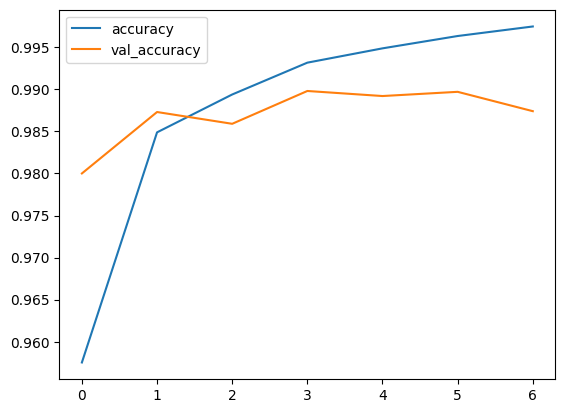

In [25]:
# Visualizamos un plot de las exactitudes
losses[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

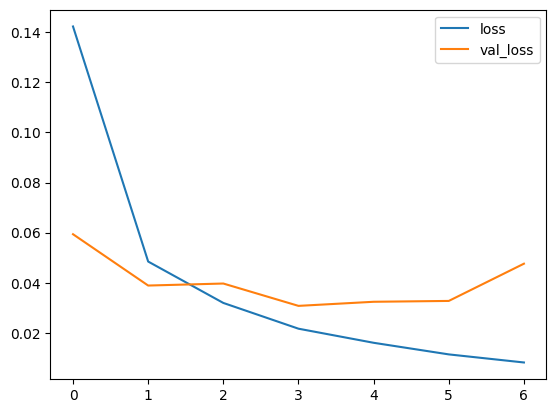

In [26]:
# Visualizamos un plot de las pérdidas
losses[['loss', 'val_loss']].plot()

# Evaluación del modelo

In [27]:
# Importamos classification_report y confusion_matrix desde sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Para poder realizar la comparativa realizamos un np.argmax, que nos devuelve un array con el índice de la clase con mayor probabilidad para cada imagen
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 2s 7ms/step


In [29]:
# Vemos el primer valor del conjunto y de prueba
categ_y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

La primera imagen corresponde con la categoría 8, osea que es un número 7

In [30]:
# Vemos la predicción para la primer imagen
predictions[0]

7

La predicción fue correcta

In [31]:
# Comparamos los valores reales con las predicciones utilizando classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      1.00      0.98      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [32]:
# Generamos una matriz de confusión
cnf_matrix = confusion_matrix(y_test, predictions)
cnf_matrix

array([[ 965,    1,    6,    1,    0,    1,    4,    0,    1,    1],
       [   0, 1133,    1,    0,    0,    0,    1,    0,    0,    0],
       [   0,    1, 1027,    0,    0,    0,    0,    4,    0,    0],
       [   0,    0,    2, 1005,    0,    1,    0,    1,    1,    0],
       [   0,    2,    1,    0,  965,    0,    2,    0,    2,   10],
       [   1,    1,    1,    9,    0,  877,    1,    0,    2,    0],
       [   1,    2,    0,    0,    1,    1,  950,    0,    3,    0],
       [   0,    2,    8,    0,    0,    0,    0, 1013,    1,    4],
       [   2,    1,    7,    1,    0,    2,    2,    3,  954,    2],
       [   0,    1,    2,    5,    3,    7,    0,    4,    2,  985]],
      dtype=int64)

<AxesSubplot: >

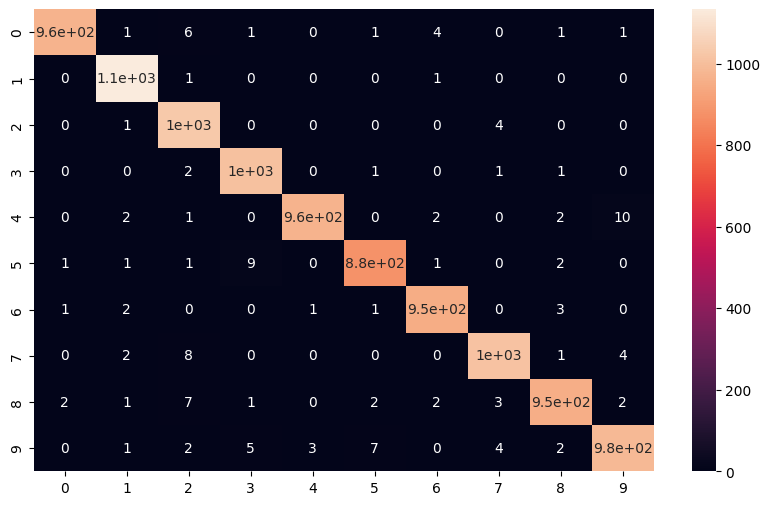

In [33]:
# Visualizamos la matriz de confusión
# Importamos seaborn
import seaborn as sns

# Creamos una figura
plt.figure(figsize=(10, 6))

# Creamos el mapa de calor
sns.heatmap(cnf_matrix, annot=True)

# Predicción de una nueva imagen

In [54]:
# Importamos io desde skimage
from skimage import io

# Definimos una variable que contenga la nueva imagen con los valores ya escalados
nueva_imagen = io.imread('./nueva_imagen.png')/255

# Vemos el shape de la imagen
nueva_imagen.shape

(28, 28)

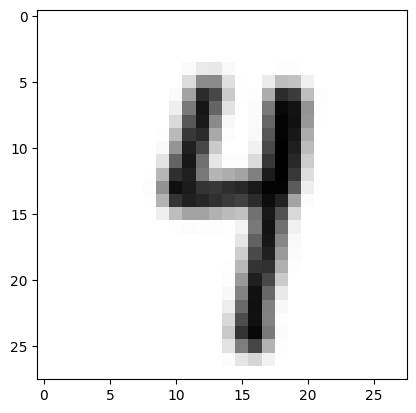

In [53]:
# Mostramos la imagen
plt.imshow(nueva_imagen, cmap='gray')

In [59]:
# Usamos el modelo para que nos identifique la imagen
print(f'El número de la imagen es: {np.argmax(model.predict(nueva_imagen.reshape(1, 28, 28, 1)))}')

1/1 [==============================] - 0s 52ms/step
El número de la imagen es: 4
